In [1]:
import snntorch as snn
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from neurons.izhikevich import Izhikevich as IZH
from neurons.lif import Leaky

In [2]:
leaky = Leaky(0.95)
memList = []
mem = 0
t_max = 100
input_ = np.array([0.1 if i < 50 else 0 for i in range(t_max)])

for i in range(t_max):
    spk, mem = leaky(input_[i], mem)
    memList.append(mem)

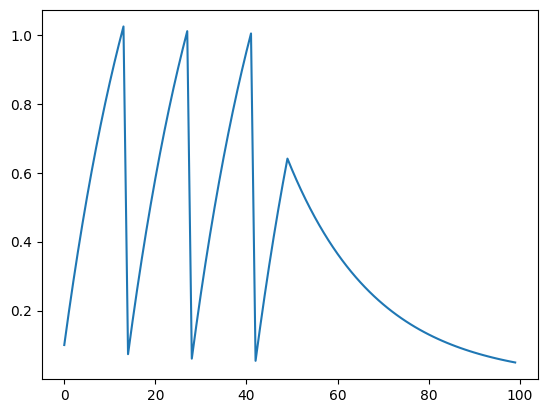

In [3]:
plt.plot(range(t_max), memList)

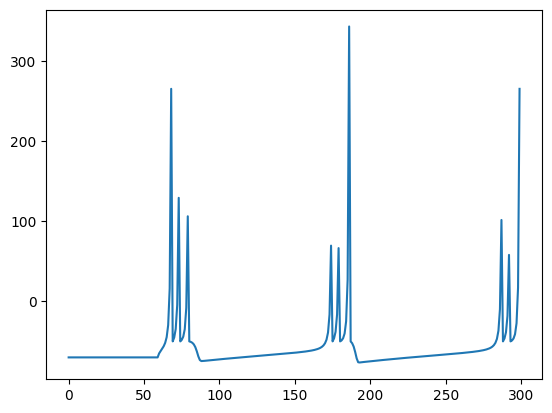

In [4]:
cfgs = {
    'RS': [[0.02,0.2,-65,8], [-70, -14]],
    'IB': [[0.02, 0.2, -55, 4], [-70, -14]],
    'CH': [[0.02, 0.2, -50,2], [-70, -14]],
    'LTS': [[0.02, 0.25, -65, 2], [-64.4, -16.1]],
    'TC': [[0.02, 0.25, -65, 0.05], [-64.4, -16.1]],
    'FS': [[0.1, 0.2, -65, 2], [-70, -14]],
    'RZ': [[0.1, 0.25, -65, 2], [-64.4, -16.1]]
}

cfg = cfgs['CH']
neuron = IZH(*(cfg[0]), threshold=30, use_psp=False, init_hidden=False)
vs, us = [], []
v,u = cfg[1]
t_max = 300
v= torch.tensor(v)
u= torch.tensor(u)

input_ = np.array([0 if i < t_max/5 else 5 for i in range(t_max)])
spks = []

I_pre, I_post = torch.tensor(0), torch.tensor(0)
for i in range(t_max):
    spk, u,v, I_pre, I_post = neuron(input_[i], u,v, I_pre, I_post)
    spks.append(spk.numpy())
    vs.append(v.numpy()[0])
    us.append(u.numpy()[0])
plt.plot(vs[:])

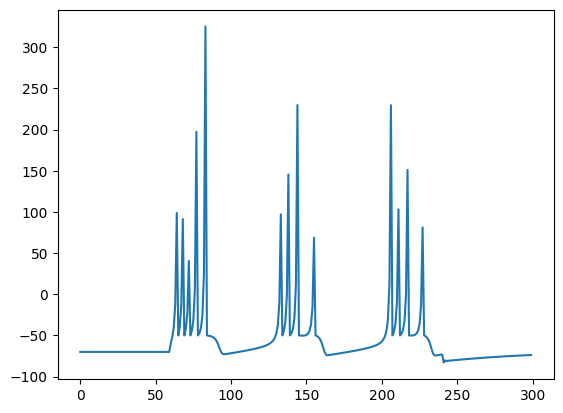

In [5]:
cfg = cfgs['CH']
neuron = IZH(*(cfg[0]), threshold=30, time_resolution=1, use_psp=False)
vs, us = [], []
v,u = cfg[1]
v= torch.tensor(v)
u= torch.tensor(u)
t_max = 300
input_ = np.array([0 if (i < t_max/5 or i > t_max*4/5) else 10 for i in range(t_max)])
spks = []
I_pre, I_post = 0, 0
for i in range(t_max):
    spk, u,v, I_pre, I_post = neuron(input_[i], u, v, I_pre, I_post)
    spks.append(spk.numpy())
    vs.append(v.numpy()[0])
    us.append(u.numpy()[0])
plt.plot(vs[:])

In [6]:
def simulateAndPlot(plot, neuron_type: str = 'RS', t_max: int = 300):
    vs, us = [], []
    v = 0
    syn = 0
    resolution = 1
    if(neuron_type == 'Leaky'):
        t_max = t_max//resolution
        input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else 0.06 for i in range(t_max)])
        neuron = Leaky(0.95)
        for i in range(t_max):
            spk, v = neuron(input_[i], v)
            vs.append(v)
        plot.plot(vs)
    else:
        input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else 10 for i in range(t_max)])
        cfg = cfgs[neuron_type]
        neuron = IZH(*(cfg[0]), threshold=30, time_resolution=1, use_psp=False)
        v,u = cfg[1]
        v= torch.tensor(v)
        u= torch.tensor(u)
        spks = []

        I_pre, I_post = 0, 0
        for i in range(t_max):
            spk, u,v, I_pre, I_post = neuron(input_[i], u, v, I_pre, I_post)
            spks.append(spk.numpy())
            vs.append(v.numpy()[0])
            us.append(u.numpy()[0])
        plot.plot(np.linspace(0,t_max/resolution, t_max) , vs)
    plot.set_title(neuron_type)
    plot.set_xlabel("time in ms")
    plot.set_ylabel("Memrane voltage in mV")


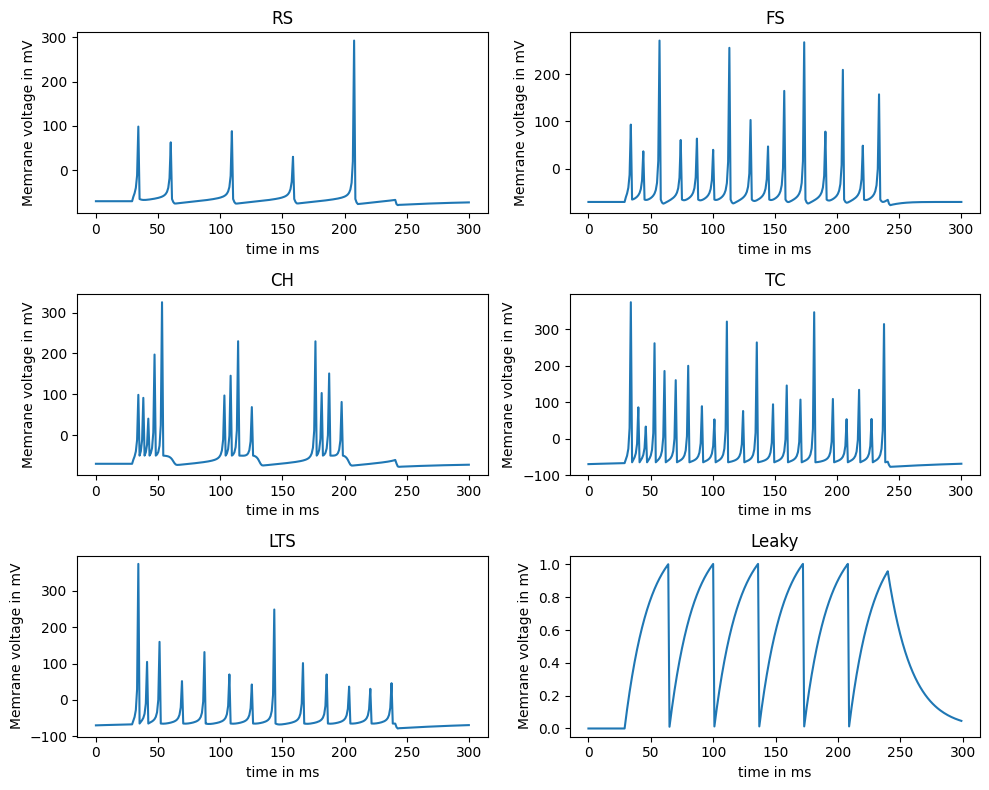

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

neuronList = ['RS','FS', 'CH','TC','LTS', 'Leaky']
i = 0
for row in axes:
    for plot in row:
        simulateAndPlot(plot, neuron_type=neuronList[i])
        i += 1

plt.tight_layout()
plt.show()

In [8]:
import seaborn as sns

<Axes: >

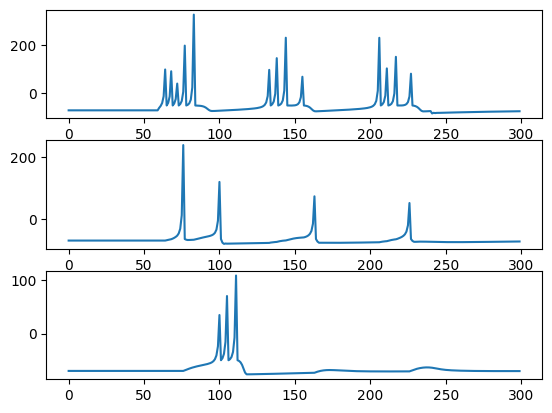

In [13]:
cfgs = {
    'RS': [[0.02,0.2,-65,8], [-70, -14]],
    'IB': [[0.02, 0.2, -55, 4], [-70, -14]],
    'CH': [[0.02, 0.2, -50,2], [-70, -14]],
    'LTS': [[0.02, 0.25, -65, 2], [-64.4, -16.1]],
    'TC': [[0.02, 0.25, -65, 0.05], [-64.4, -16.1]],
    'FS': [[0.1, 0.2, -65, 2], [-70, -14]],
    'RZ': [[0.1, 0.25, -65, 2], [-64.4, -16.1]]
}

cfg = cfgs['CH']
neuron1 = IZH(*(cfg[0]), initial_u=cfg[1][1], initial_v=cfg[1][0], threshold=30, use_psp=False, init_hidden=True, output=True)
cfg = cfgs['RS']
neuron2 = IZH(*(cfg[0]), initial_u=cfg[1][1], initial_v=cfg[1][0], threshold=30, use_psp=True, init_hidden=True, alpha=0.94, output=True)
cfg = cfgs['CH']
neuron3 = IZH(*(cfg[0]), initial_u=cfg[1][1], initial_v=cfg[1][0], threshold=30, use_psp=True, init_hidden=True, alpha=0.94, output=True)
vs, us = [], []
v,u = cfg[1]
t_max = 300
v= torch.tensor(v)
u= torch.tensor(u)
vs2, vs3 =[], []

input_ = np.array([0 if (i < t_max/5 or i > t_max*4/5) else 10 for i in range(t_max)])
spks = []

I_pre, I_post = torch.tensor(0), torch.tensor(0)
for i in range(t_max):
    spk1, v1 = neuron1(input_[i])
    spk2, v2 = neuron2(spk1*7)
    spk3, v3 = neuron3(spk2*7)
    vs.append(v1.numpy()[0])
    vs2.append(v2.numpy()[0])
    vs3.append(v3.numpy()[0])
    spks.append(spk2.numpy())

fig, ax = plt.subplots(3,1)
sns.lineplot(vs[:], ax=ax[0])
sns.lineplot(vs2[:], ax=ax[1])
sns.lineplot(vs3[:], ax=ax[2])